In [2]:
import pandas as pd

In [5]:
import os
print('Get current working directory : ', os.getcwd())

Get current working directory :  /Users/aokoln


In [72]:
od = pd.read_csv('/Users/aokoln/Downloads/Occupation Data 2023.csv')

In [73]:
od.head()

,YEAR,CLASSID,CLASSID_NAME,AREAID,AREAID_NAME,OCCID,OCCID_NAME,EARN_AVG
0,2031,4,Extended Proprietors,1125010702,NaN,51-7021,Furniture Finishers,0.000000
1,2011,4,Extended Proprietors,17031470100,NaN,43-4111,"Interviewers, Except Eligibility and Loan",31.011969
2,2016,3,Self-Employed,9009150300,NaN,31-2022,Physical Therapist Aides,17.508876
3,2004,1,QCEW Employees,6071002206,NaN,47-2131,"Insulation Workers, Floor, Ceiling, and Wall",0.000000
4,2031,2,Non-QCEW Employees,ZIP96810,"Honolulu, HI",13-1082,Project Management Specialists,0.000000


In [19]:
#od.tail()

In [18]:
od.describe()

,YEAR,CLASSID,EARN_AVG
count,100.000000,100.000000,100.000000
mean,2018.760000,2.410000,10.182056
std,10.039437,1.206841,17.398345
min,2001.000000,1.000000,0.000000
25%,2010.750000,1.000000,0.000000
50%,2021.000000,2.000000,0.000000
75%,2028.000000,4.000000,15.706400
max,2033.000000,4.000000,88.768946


In [22]:
#len(od)

In [9]:
od.dtypes

YEAR              int64
CLASSID           int64
CLASSID_NAME     object
AREAID           object
AREAID_NAME      object
OCCID            object
OCCID_NAME       object
EARN_AVG        float64
dtype: object

In [20]:
#od[od['EARN_AVG'] != 0]

In [29]:
# How many occupation name do we have?
occid_name = od['OCCID_NAME']
occid_name = occid_name.drop_duplicates()
len(occid_name)

96

In [36]:
# Looking for a way to write above in one line
#len([od['OCCID_NAME']].drop_duplicates())

In [109]:
# What is the average earning of CLASSID_NAME in different years? Visualization is necessary(bar graph)
earn_year_classid = od.loc[od['EARN_AVG'] != 0]
earn_year_classid = pd.DataFrame(earn_year_classid.groupby(['YEAR','CLASSID_NAME'])['EARN_AVG'].agg('mean')).sort_values(by=['YEAR','CLASSID_NAME'])

In [120]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16.0, 6.0)
plt.figure()
#plt.bar(earn_year_classid['YEAR'],earn_year_classid['EARN_AVG'])
#plt.show()
#help(plt.bar)

# https://www.analyticsvidhya.com/blog/2021/08/understanding-bar-plots-in-python-beginners-guide-to-data-visualization/
# Unstacked Bar Plots - not sure how to get data into the right format

Help on function bar in module matplotlib.pyplot:

bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)
    Make a bar plot.
    
    The bars are positioned at *x* with the given *align*\ment. Their
    dimensions are given by *height* and *width*. The vertical baseline
    is *bottom* (default 0).
    
    Many parameters can take either a single value applying to all bars
    or a sequence of values, one for each bar.
    
    Parameters
    ----------
    x : float or array-like
        The x coordinates of the bars. See also *align* for the
        alignment of the bars to the coordinates.
    
    height : float or array-like
        The height(s) of the bars.
    
    width : float or array-like, default: 0.8
        The width(s) of the bars.
    
    bottom : float or array-like, default: 0
        The y coordinate(s) of the bottom side(s) of the bars.
    
    align : {'center', 'edge'}, default: 'center'
        Alignment of the bars to the *x* coord

<Figure size 1600x600 with 0 Axes>

Text(0.5, 1.0, 'Average Earning of CLASSID by Year')

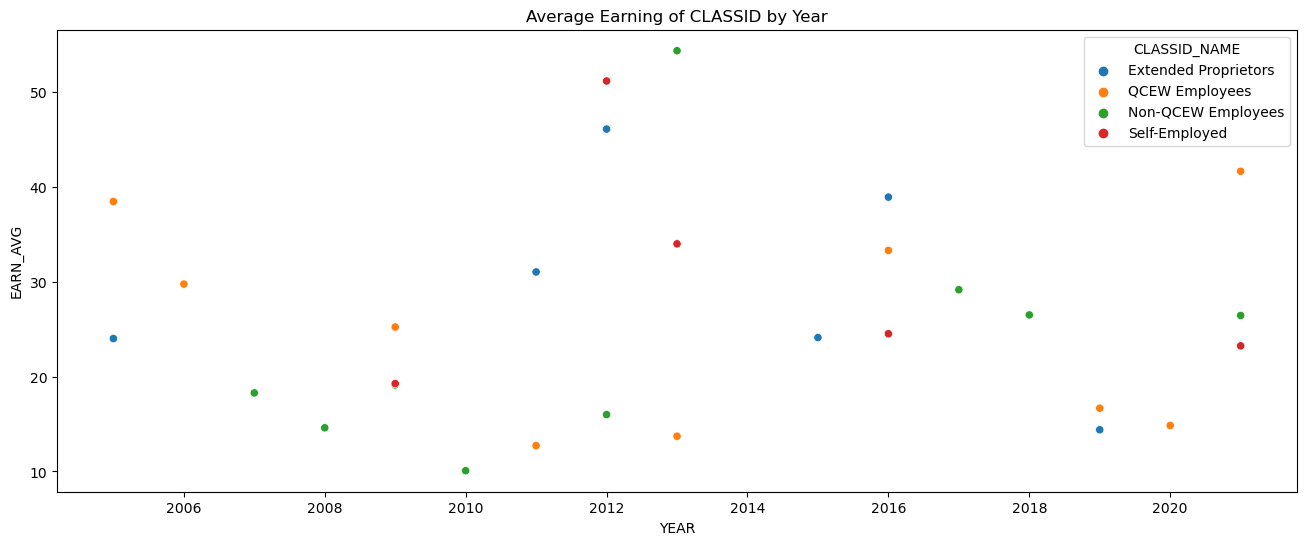

In [121]:
import seaborn as sns
sns.scatterplot(data=earn_year_classid, 
                x='YEAR', 
                y='EARN_AVG', 
                hue='CLASSID_NAME')
plt.title("Average Earning of CLASSID by Year")

In [125]:
# Report the number of missing values in the table
od.isnull().describe()

,YEAR,CLASSID,CLASSID_NAME,AREAID,AREAID_NAME,OCCID,OCCID_NAME,EARN_AVG
count,100,100,100,100,100,100,100,100
unique,1,1,1,1,2,1,1,1
top,False,False,False,False,True,False,False,False
freq,100,100,100,100,72,100,100,100


In [131]:
# Missing EARN_AVG
len(od[od['EARN_AVG'] == 0])

63

In [132]:
# Find the key to be able to get merged with other tables - OCCID
oea = pd.read_csv('/Users/aokoln/Downloads/Occupation Educational Attainment 2023.csv')
oea.head()

,YEAR,OCCID,OCCID_NAME,EDUID,EDUID_NAME
0,2020,17-3031,Surveying and Mapping Technicians,1,Less than high school diploma
1,2020,21-1013,Marriage and Family Therapists,2,High school diploma or equivalent
2,2020,33-2022,Forest Fire Inspectors and Prevention Specialists,5,Bachelor's degree
3,2020,51-3099,"Food Processing Workers, All Other",5,Bachelor's degree
4,2020,33-9099,"Protective Service Workers, All Other",1,Less than high school diploma


In [136]:
oea[['YEAR']].drop_duplicates()

,YEAR
0,2020


In [174]:
# What is the distribution of CLASSID_NAME? 8 unique CLASSID_name: how many data points.
class_counts = od.groupby('CLASSID_NAME')['EARN_AVG'].count()
class_counts.name = 'count'
class_counts

CLASSID_NAME
Extended Proprietors    28
Non-QCEW Employees      23
QCEW Employees          32
Self-Employed           17
Name: count, dtype: int64

Text(0, 0.5, 'Count')

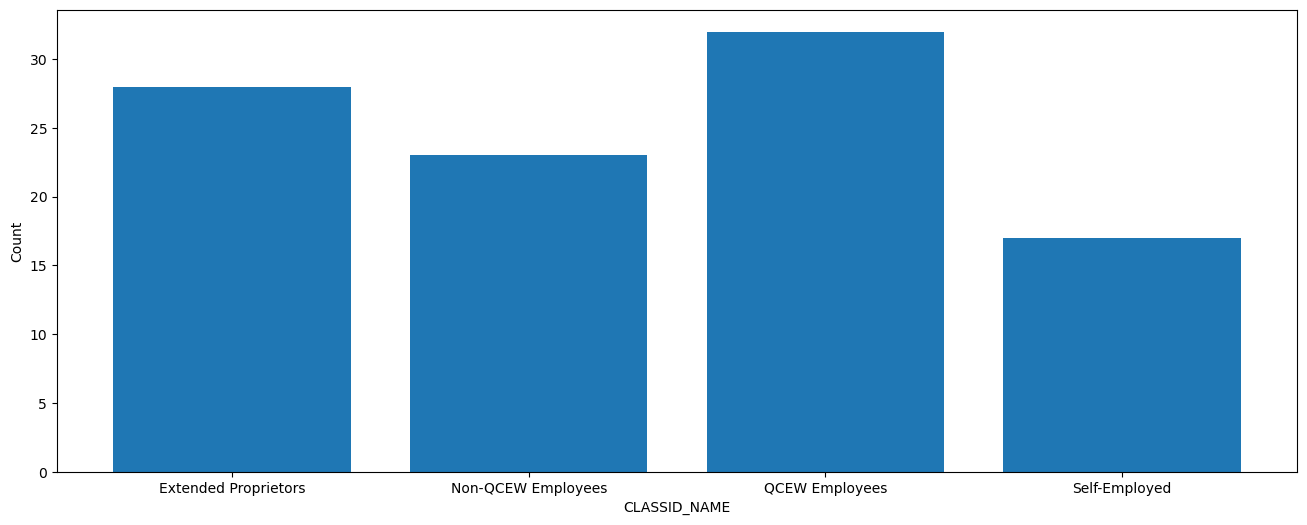

In [175]:
plt.figure()

plt.bar(class_counts.index,class_counts)
plt.xlabel('CLASSID_NAME')
plt.ylabel('Count')

In [160]:
# What is the distribution of CLASSID_NAME in different countries?
pd.pivot_table(od,values='CLASSID',index='AREAID_NAME',columns='CLASSID_NAME',aggfunc='count')

CLASSID_NAME,Extended Proprietors,Non-QCEW Employees,QCEW Employees,Self-Employed
AREAID_NAME,,,,
"Accomac, VA",1.0,NaN,NaN,NaN
"Alexandria, TN",1.0,NaN,NaN,NaN
"Birmingham, AL",NaN,1.0,NaN,NaN
"Brackettville, TX",NaN,NaN,1.0,NaN
"Canyon Country, CA",NaN,NaN,1.0,NaN
"Chisago City, MN",NaN,NaN,1.0,NaN
"Cleveland, TX",1.0,NaN,NaN,NaN
"Cold Spring, MN",NaN,NaN,NaN,1.0
"Copake, NY",NaN,1.0,NaN,NaN


In [195]:
# What is the education degrees related to each occupation name?
pd.pivot_table(oea,values='OCCID',index='OCCID_NAME',columns='EDUID_NAME',aggfunc='count')

EDUID_NAME,Associate's degree,Bachelor's degree,Doctoral or professional degree,High school diploma or equivalent,Less than high school diploma,Master's degree,"Some college, no degree"
OCCID_NAME,,,,,,,
"Administrative Law Judges, Adjudicators, and Hearing Officers",NaN,NaN,NaN,1.0,NaN,NaN,NaN
Aerospace Engineers,NaN,NaN,NaN,1.0,NaN,NaN,NaN
Agricultural Equipment Operators,NaN,NaN,NaN,1.0,NaN,NaN,NaN
Aircraft Service Attendants,1.0,NaN,NaN,NaN,NaN,NaN,NaN
Airfield Operations Specialists,1.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
Transit and Railroad Police,NaN,NaN,1.0,NaN,NaN,NaN,NaN
"Transportation, Storage, and Distribution Managers",NaN,NaN,NaN,NaN,NaN,1.0,NaN
"Weighers, Measurers, Checkers, and Samplers, Recordkeeping",NaN,NaN,NaN,NaN,1.0,NaN,NaN


In [197]:
# Now report different education degrees for each CLASSID_NAME
oe_join = pd.merge(od,oea,how = 'inner',on = 'OCCID')
#oe_join.head()
pd.pivot_table(oe_join,values='OCCID',index='CLASSID_NAME',columns='EDUID_NAME',aggfunc='count')

EDUID_NAME,Bachelor's degree,Doctoral or professional degree,High school diploma or equivalent,Less than high school diploma,Master's degree,"Some college, no degree"
CLASSID_NAME,,,,,,
Extended Proprietors,NaN,1.0,NaN,1.0,1.0,NaN
Non-QCEW Employees,1.0,NaN,NaN,1.0,NaN,1.0
QCEW Employees,NaN,1.0,1.0,NaN,NaN,NaN
